# Importation of Libraries 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Reading

In [3]:
flights_clean = pd.read_csv('data/flights_clean.csv', low_memory = True) 
flights_clean_numerical = pd.read_csv('data/flights_clean_numerical.csv', low_memory = True)

In [4]:
flights_clean.head()

airline  day  day_of_week  departure_delay destination_airport  \
0      AS    1            4            -11.0                 SEA   
1      AS    1            4             -4.0                 SEA   
2      DL    1            4            -14.0                 SEA   
3      AS    1            4            -15.0                 SEA   
4      AS    1            4            -11.0                 SEA   

   destination_latitude  destination_longitude  distance  month  \
0              47.44898             -122.30931      1448      1   
1              47.44898             -122.30931      1448      1   
2              47.44898             -122.30931      1448      1   
3              47.44898             -122.30931      1448      1   
4              47.44898             -122.30931      1448      1   

  origin_airport  ...  scheduled_arrival  scheduled_departure  scheduled_time  \
0            ANC  ...                270                    5           205.0   
1            ANC  ...                309                   45           204.0   
2            ANC  ...                315                   45           210.0   
3            ANC  ...                393                  115           218.0   
4            ANC  ...                400                  140           200.0   

   state_destination  state_origin taxi_in taxi_out  day_of_year  \
0                 WA            AK     4.0     21.0            1   
1                 WA            AK     4.0     17.0            1   
2                 WA            AK     4.0     25.0            1   
3                 WA            AK    11.0     17.0            1   
4                 WA            AK     8.0     15.0            1   

   origin_temperature  destination_temperature  
0                35.2                     32.9  
1                35.2                     32.9  
2                35.2                     32.9  
3                35.2                     32.9  
4                35.2                     32.9  

[5 rows x 22 columns]

In [5]:
flights_clean.columns # 22 columns

Index(['airline', 'day', 'day_of_week', 'departure_delay',
       'destination_airport', 'destination_latitude', 'destination_longitude',
       'distance', 'month', 'origin_airport', 'origin_latitude',
       'origin_longitude', 'scheduled_arrival', 'scheduled_departure',
       'scheduled_time', 'state_destination', 'state_origin', 'taxi_in',
       'taxi_out', 'day_of_year', 'origin_temperature',
       'destination_temperature'],
      dtype='object')

In [6]:
flights_clean_numerical.head()

day  day_of_week  departure_delay  destination_latitude  \
0    1            4            -11.0              47.44898   
1    1            4             -4.0              47.44898   
2    1            4            -14.0              47.44898   
3    1            4            -15.0              47.44898   
4    1            4            -11.0              47.44898   

   destination_longitude  distance  month  origin_latitude  origin_longitude  \
0             -122.30931      1448      1         61.17432        -149.99619   
1             -122.30931      1448      1         61.17432        -149.99619   
2             -122.30931      1448      1         61.17432        -149.99619   
3             -122.30931      1448      1         61.17432        -149.99619   
4             -122.30931      1448      1         61.17432        -149.99619   

   scheduled_arrival  ...  state_origin_SD  state_origin_TN  state_origin_TX  \
0                270  ...                0                0                0   
1                309  ...                0                0                0   
2                315  ...                0                0                0   
3                393  ...                0                0                0   
4                400  ...                0                0                0   

   state_origin_UT  state_origin_VA  state_origin_VT  state_origin_WA  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   state_origin_WI  state_origin_WV  state_origin_WY  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0  
4                0                0                0  

[5 rows x 407 columns]

In [7]:
flights_clean_numerical.columns #407 columns

Index(['day', 'day_of_week', 'departure_delay', 'destination_latitude',
       'destination_longitude', 'distance', 'month', 'origin_latitude',
       'origin_longitude', 'scheduled_arrival',
       ...
       'state_origin_SD', 'state_origin_TN', 'state_origin_TX',
       'state_origin_UT', 'state_origin_VA', 'state_origin_VT',
       'state_origin_WA', 'state_origin_WI', 'state_origin_WV',
       'state_origin_WY'],
      dtype='object', length=407)

# Data Preparation

#### General Sample Extraction Method

In [8]:
flights_clean.columns # 22 columns

Index(['airline', 'day', 'day_of_week', 'departure_delay',
       'destination_airport', 'destination_latitude', 'destination_longitude',
       'distance', 'month', 'origin_airport', 'origin_latitude',
       'origin_longitude', 'scheduled_arrival', 'scheduled_departure',
       'scheduled_time', 'state_destination', 'state_origin', 'taxi_in',
       'taxi_out', 'day_of_year', 'origin_temperature',
       'destination_temperature'],
      dtype='object')

In [89]:
# A random sample of flight data contained therein is extracted without considering any potential covariate shifts 
# of any flight characterics.

flights_sample1 = flights_clean.sample(n=10000)
flights_sample1.origin_airport.value_counts()

# One way of assessing the distribution of our data is by finding the ratio of the frequency of the most recurrent 
# value to the frequency of the least recurrent value in an essential column, such as origin_airport and 
# destination_airport, which already implicitly takes into account city and state. 

origin_freq = max(flights_sample1.origin_airport.value_counts())/min(flights_sample1.origin_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for origin_airport is: ',origin_freq )
destination_freq = max(flights_sample1.destination_airport.value_counts())/min(flights_sample1.destination_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for destination_airport is: ',destination_freq )


The frequency ratio of the most and least recurrenct value for origin_airport is:  707.0
The frequency ratio of the most and least recurrenct value for destination_airport is:  695.0


<AxesSubplot:>

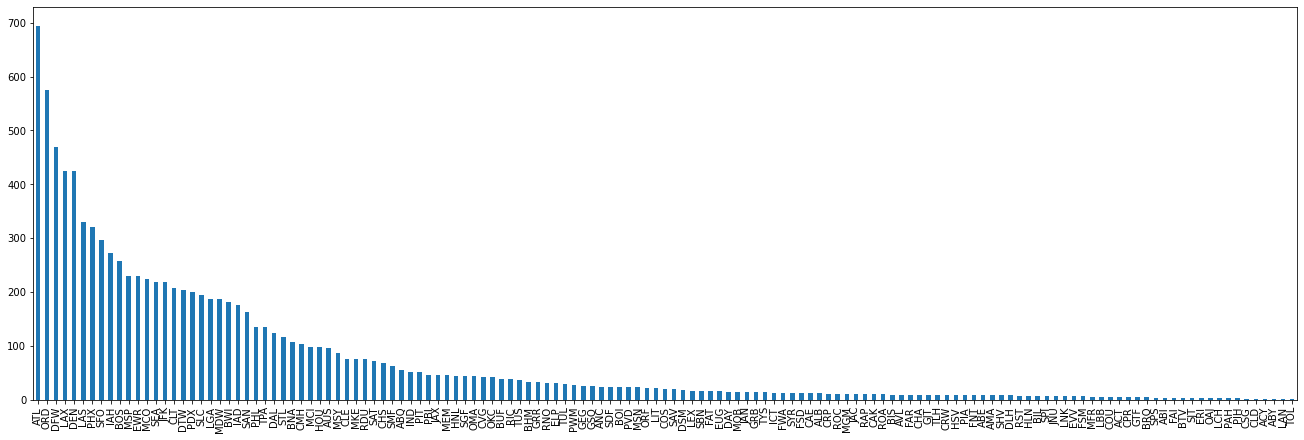

In [90]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_sample1.destination_airport.value_counts().plot(kind='bar')

<AxesSubplot:>

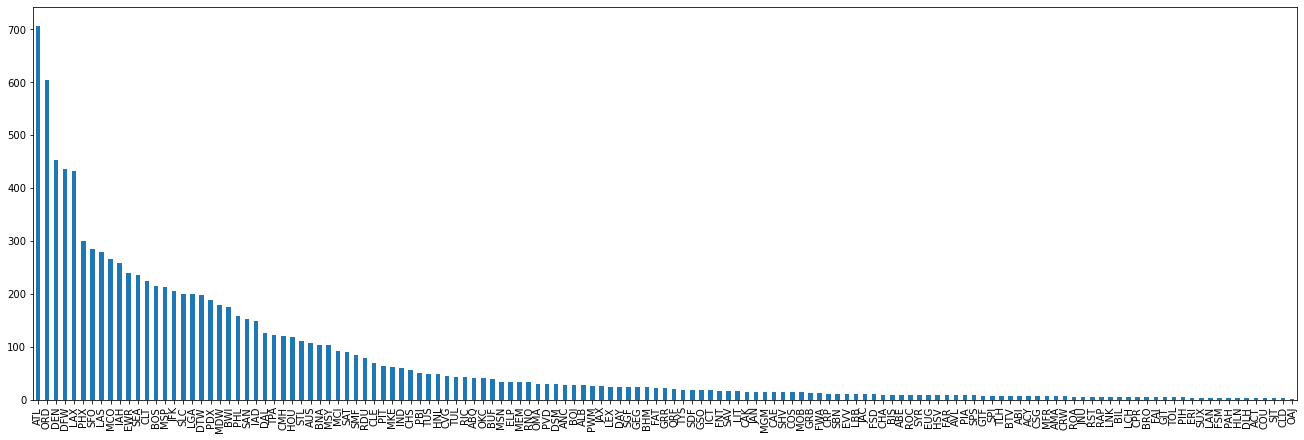

In [91]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_sample1.origin_airport.value_counts().plot(kind='bar')

#### Unidimensional Data-Balancing Sample Extraction Method

In [12]:
flights_sample21 = flights_clean.groupby(['origin_airport']).apply(lambda x:x.sample(100))

origin_freq = max(flights_sample21.origin_airport.value_counts())/min(flights_sample21.origin_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for origin_airport is: ',origin_freq )
destination_freq = max(flights_sample21.destination_airport.value_counts())/min(flights_sample21.destination_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for destination_airport is: ',destination_freq )

The frequency ratio of the most and least recurrenct value for origin_airport is:  1.0
The frequency ratio of the most and least recurrenct value for destination_airport is:  2121.0


<AxesSubplot:>

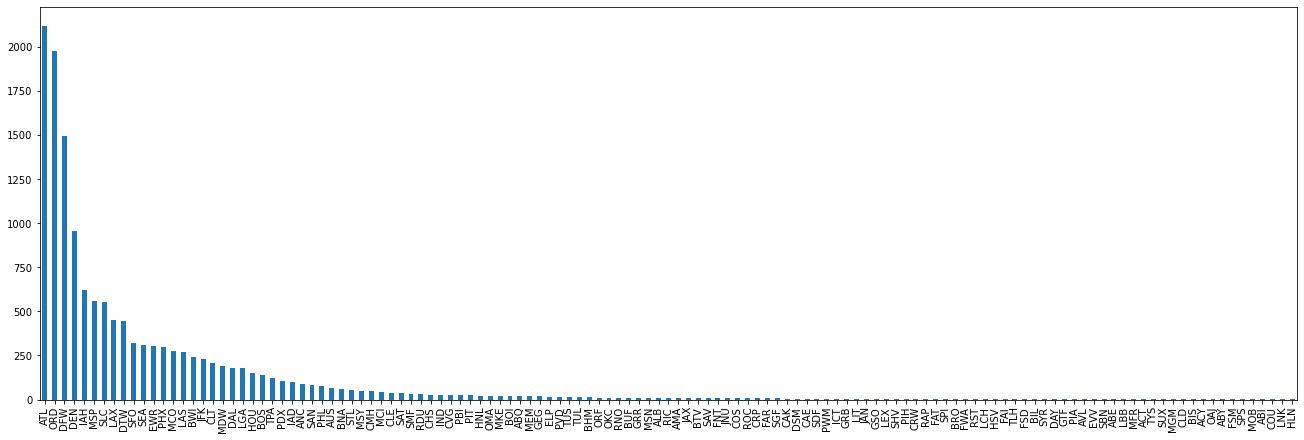

In [13]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_sample21.destination_airport.value_counts().plot(kind='bar')

In [14]:
flights_sample22 = flights_clean.groupby(['destination_airport']).apply(lambda x:x.sample(100))

origin_freq = max(flights_sample22.origin_airport.value_counts())/min(flights_sample22.origin_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for origin_airport is: ',origin_freq )
destination_freq = max(flights_sample22.destination_airport.value_counts())/min(flights_sample22.destination_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for destination_airport is: ',destination_freq )

The frequency ratio of the most and least recurrenct value for origin_airport is:  2076.0
The frequency ratio of the most and least recurrenct value for destination_airport is:  1.0


<AxesSubplot:>

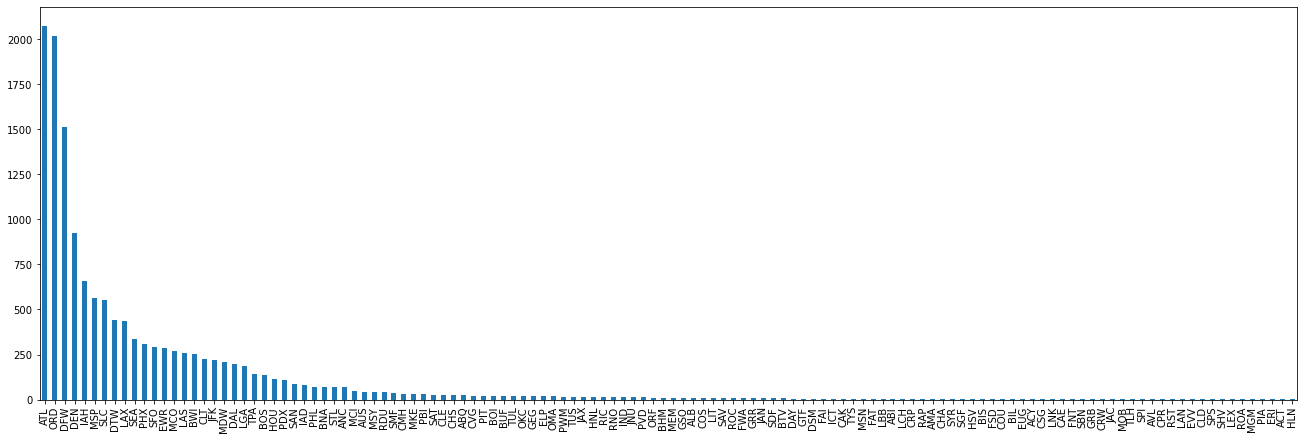

In [15]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_sample22.origin_airport.value_counts().plot(kind='bar')

#### Multidimensional Data-Balancing Sample Extraction Method

In [81]:
# Create two dataframes that are each derived using the previous method and then concatenate them.

flights_samplen1 = flights_clean.groupby(['origin_airport'], as_index = False).apply(lambda x:x.sample(200))
flights_samplen2 = flights_clean.groupby(['destination_airport'], as_index = False).apply(lambda x:x.sample(200))

flights_samplen1 = flights_samplen1.reset_index().drop(columns = ['level_1','level_0'])
flights_samplen2 = flights_samplen2.reset_index().drop(columns = ['level_1','level_0'])

# Concatenation of Both DataFrames flights_sample1 and flights_sample2
flights_sample3 = pd.concat([flights_samplen1,flights_samplen2], axis=0).drop_duplicates()

origin_freq = max(flights_sample3.origin_airport.value_counts())/min(flights_sample3.origin_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for origin_airport is: ',origin_freq )
destination_freq = max(flights_sample3.destination_airport.value_counts())/min(flights_sample3.destination_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for destination_airport is: ',destination_freq )

The frequency ratio of the most and least recurrenct value for origin_airport is:  22.12
The frequency ratio of the most and least recurrenct value for destination_airport is:  22.065


<AxesSubplot:>

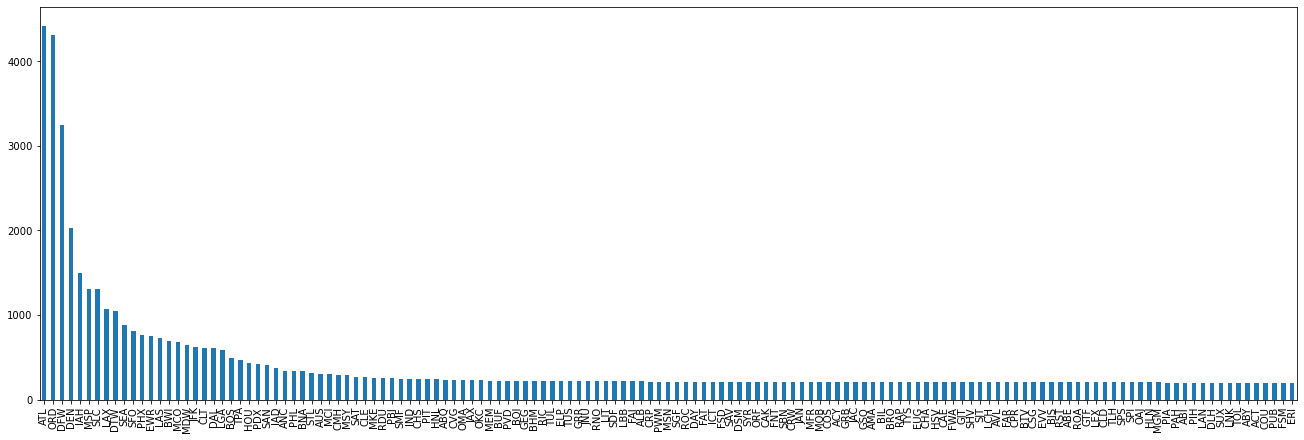

In [82]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_sample3.origin_airport.value_counts().plot(kind='bar')

<AxesSubplot:>

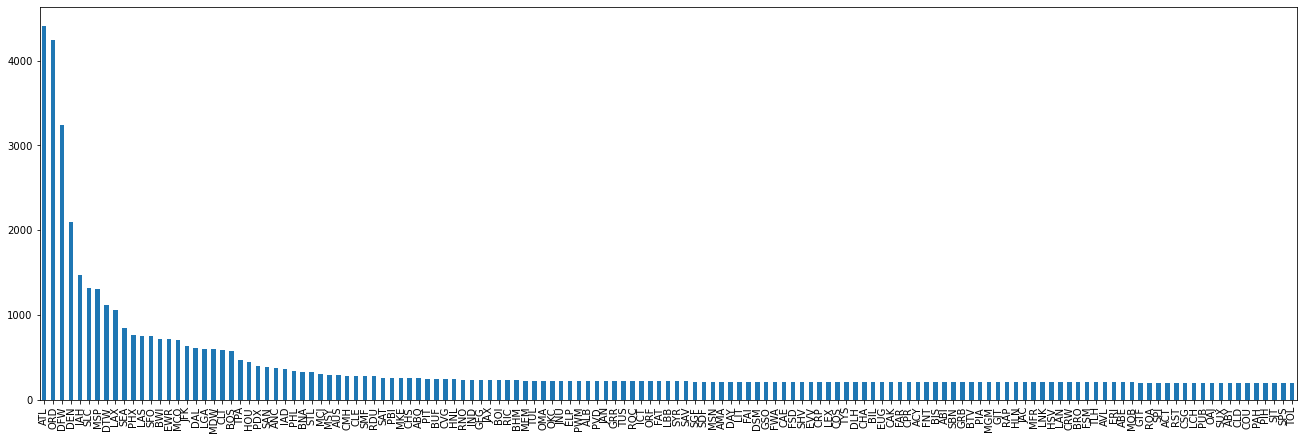

In [83]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_sample3.destination_airport.value_counts().plot(kind='bar')

### Assessing the Possibility of Substantial **Covariate Shifts** between Sample (Train) and Whole Dataset (Test)

In [25]:
max(flights_clean.origin_airport.value_counts())/min(flights_clean.origin_airport.value_counts())
max(flights_clean.destination_airport.value_counts())/min(flights_clean.destination_airport.value_counts())

origin_freq = max(flights_clean.origin_airport.value_counts())/min(flights_clean.origin_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for origin_airport is: ',origin_freq )
destination_freq = max(flights_clean.destination_airport.value_counts())/min(flights_clean.destination_airport.value_counts())
print('The frequency ratio of the most and least recurrenct value for destination_airport is: ',destination_freq )

The frequency ratio of the most and least recurrenct value for origin_airport is:  1108.5533596837945
The frequency ratio of the most and least recurrenct value for destination_airport is:  1100.1333333333334


<AxesSubplot:>

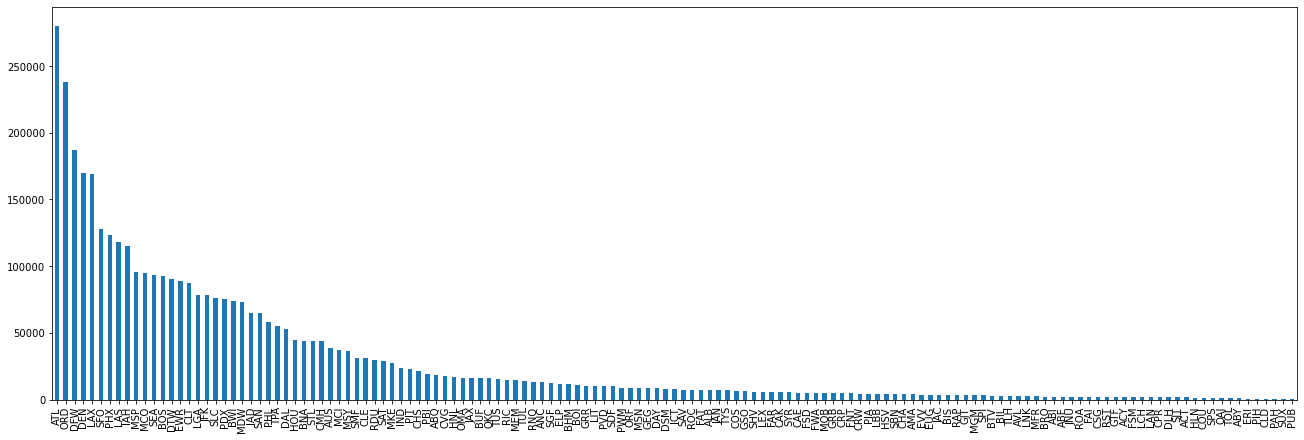

In [26]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_clean.origin_airport.value_counts().plot(kind='bar')

<AxesSubplot:>

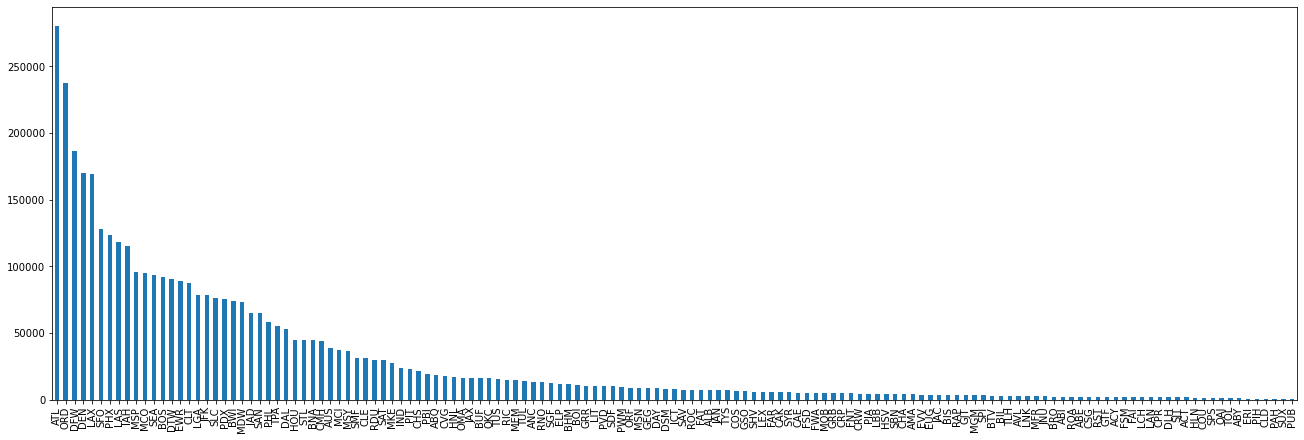

In [27]:
plt.figure(figsize=(18,6), layout = 'constrained')
flights_clean.destination_airport.value_counts().plot(kind='bar')

In [98]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(flights_sample1.destination_airport.value_counts(), flights_clean.destination_airport.value_counts())
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")


t-test: statistic=-7.1898, p-value=0.0000


In [92]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(flights_sample1.destination_airport.value_counts(), flights_clean.destination_airport.value_counts())
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")


 Mann–Whitney U Test: statistic=14.0000, p-value=0.0000


**EDA:** It seems that given the statistic values and p-values derived from both the t-tests and Mann-Whitney U Tests and given our observation of the frequency distribution of the airports in all the samples and the overall dataset, the first sample, flights_sample1, may be the safest and most representative training set of all.

# Data Visualization and Statistical Analysis 

## Pairplot

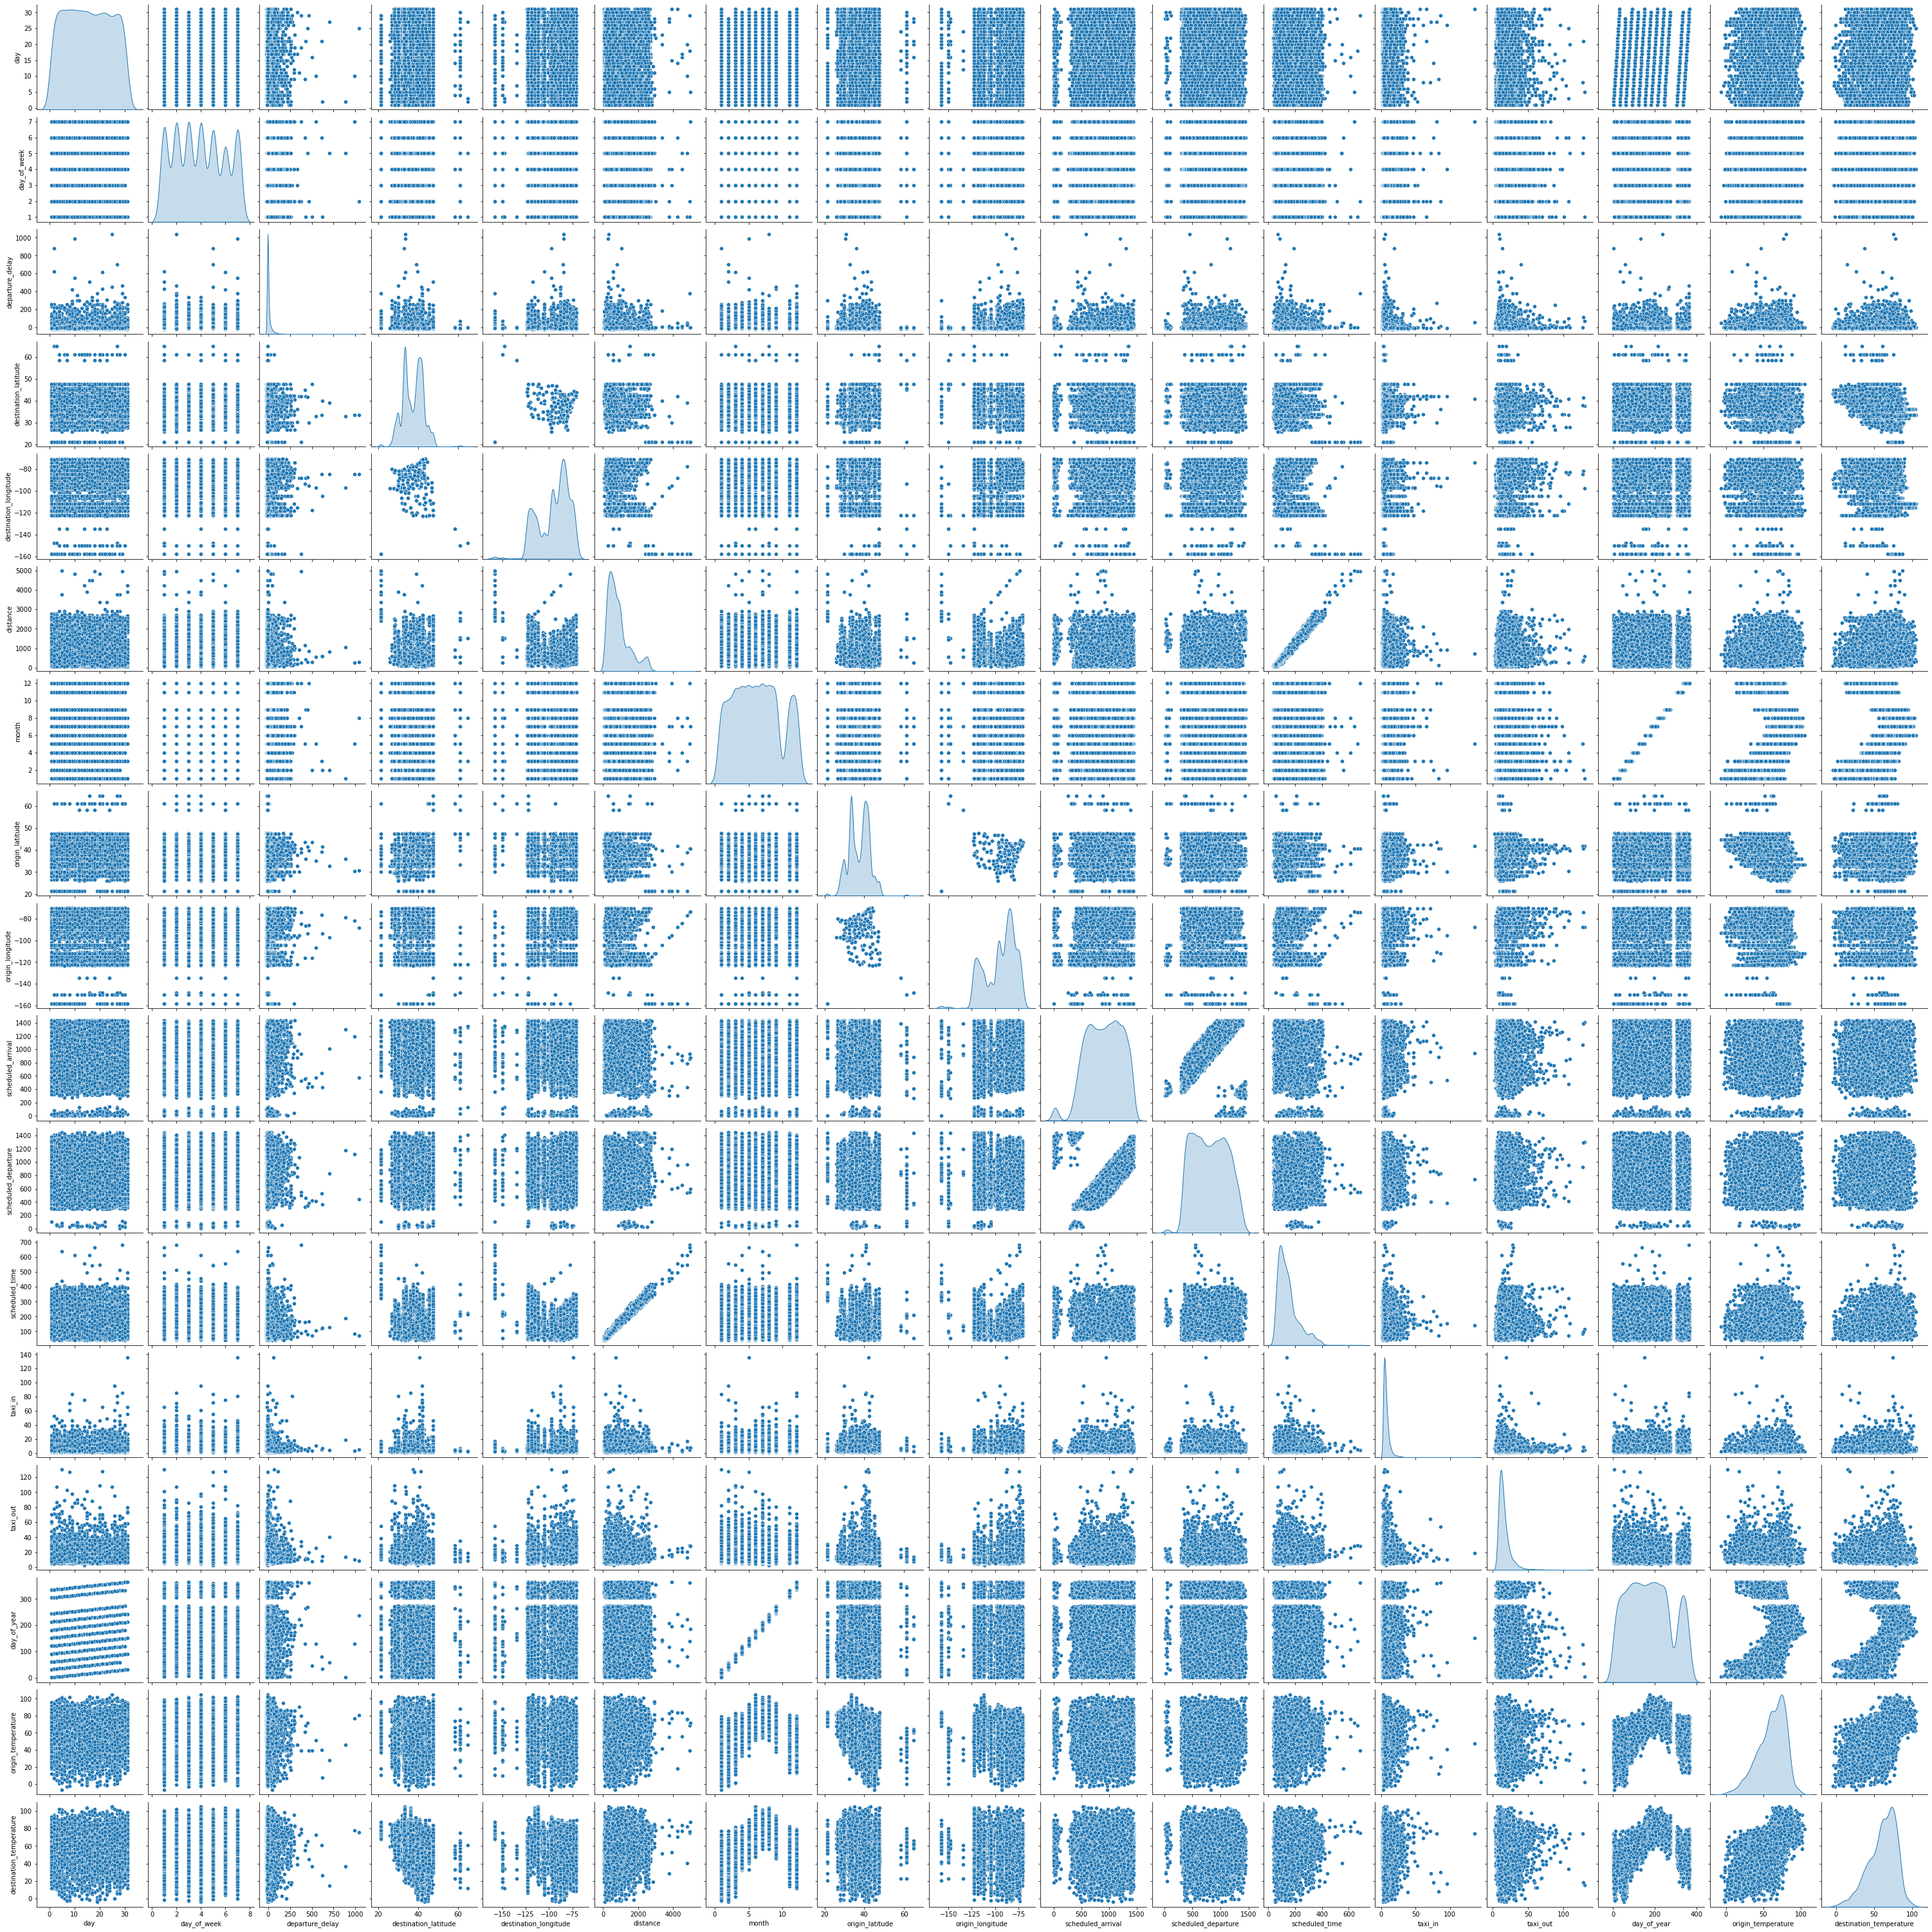

In [99]:
sns.pairplot(data=flights_sample1, diag_kind='kde')


**EDA:**

### Correleation Analysis

In [100]:
# Create correlation matrix
corr_matrix = flights_sample1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.30
highcorr_matrix = upper[(upper > 0.45)]

highcorr_mat = highcorr_matrix.dropna(how='all')
highcorr_mat

day  day_of_week  departure_delay  destination_latitude  \
distance            NaN          NaN              NaN                   NaN   
month               NaN          NaN              NaN                   NaN   
scheduled_arrival   NaN          NaN              NaN                   NaN   
origin_temperature  NaN          NaN              NaN                   NaN   

                    destination_longitude  distance  month  origin_latitude  \
distance                              NaN       NaN    NaN              NaN   
month                                 NaN       NaN    NaN              NaN   
scheduled_arrival                     NaN       NaN    NaN              NaN   
origin_temperature                    NaN       NaN    NaN              NaN   

                    origin_longitude  scheduled_arrival  scheduled_departure  \
distance                         NaN                NaN                  NaN   
month                            NaN                NaN                  NaN   
scheduled_arrival                NaN                NaN             0.668025   
origin_temperature               NaN                NaN                  NaN   

                    scheduled_time  taxi_in  taxi_out  day_of_year  \
distance                  0.983737      NaN       NaN          NaN   
month                          NaN      NaN       NaN     0.996341   
scheduled_arrival              NaN      NaN       NaN          NaN   
origin_temperature             NaN      NaN       NaN          NaN   

                    origin_temperature  destination_temperature  
distance                           NaN                      NaN  
month                              NaN                      NaN  
scheduled_arrival                  NaN                      NaN  
origin_temperature                 NaN                 0.671841

### Analysis of Potential Variable Interactions and Transformations 

In [101]:
flights_sample1.columns

Index(['airline', 'day', 'day_of_week', 'departure_delay',
       'destination_airport', 'destination_latitude', 'destination_longitude',
       'distance', 'month', 'origin_airport', 'origin_latitude',
       'origin_longitude', 'scheduled_arrival', 'scheduled_departure',
       'scheduled_time', 'state_destination', 'state_origin', 'taxi_in',
       'taxi_out', 'day_of_year', 'origin_temperature',
       'destination_temperature'],
      dtype='object')

##### Plots of Numeric Predictors Against Response Variable

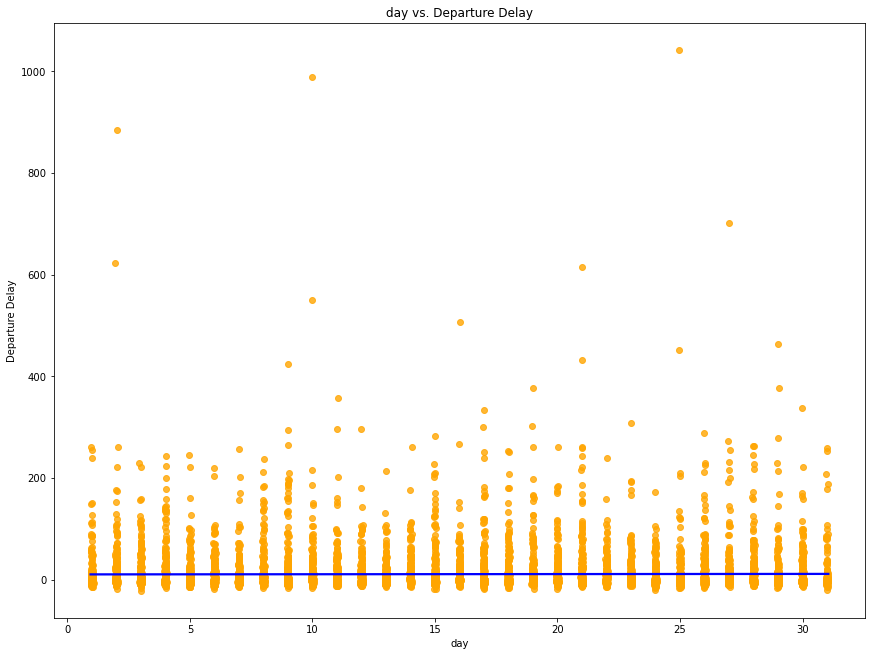

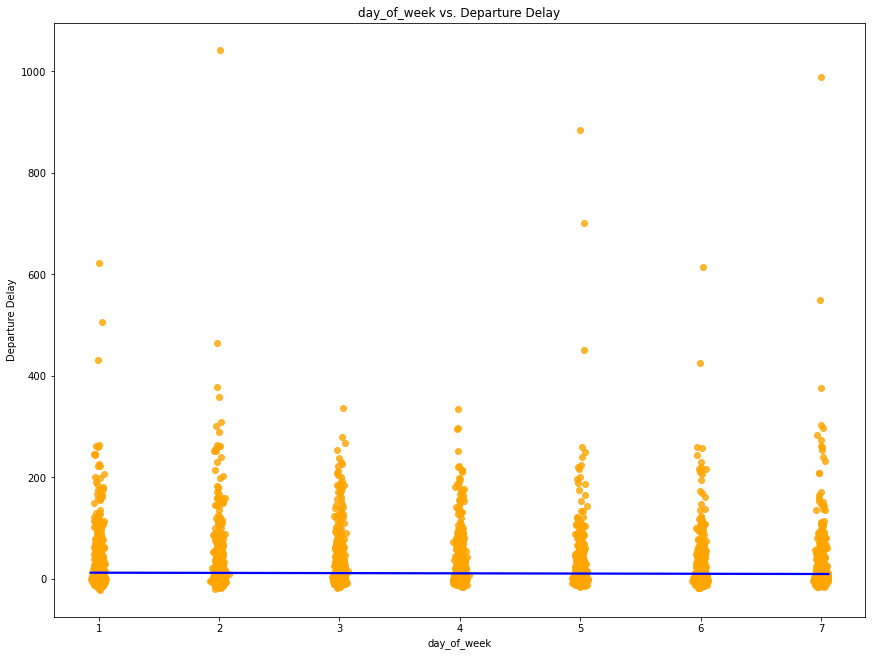

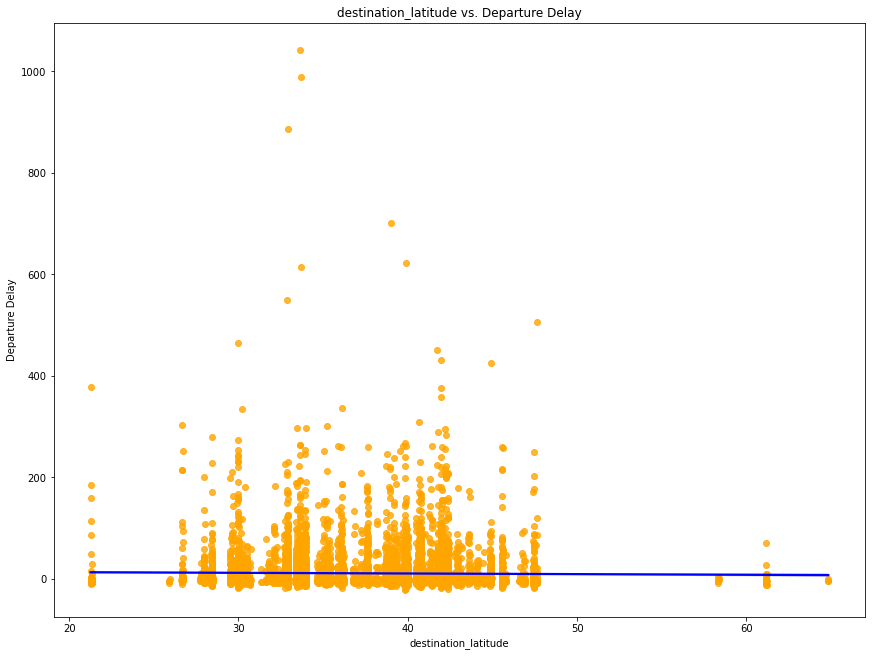

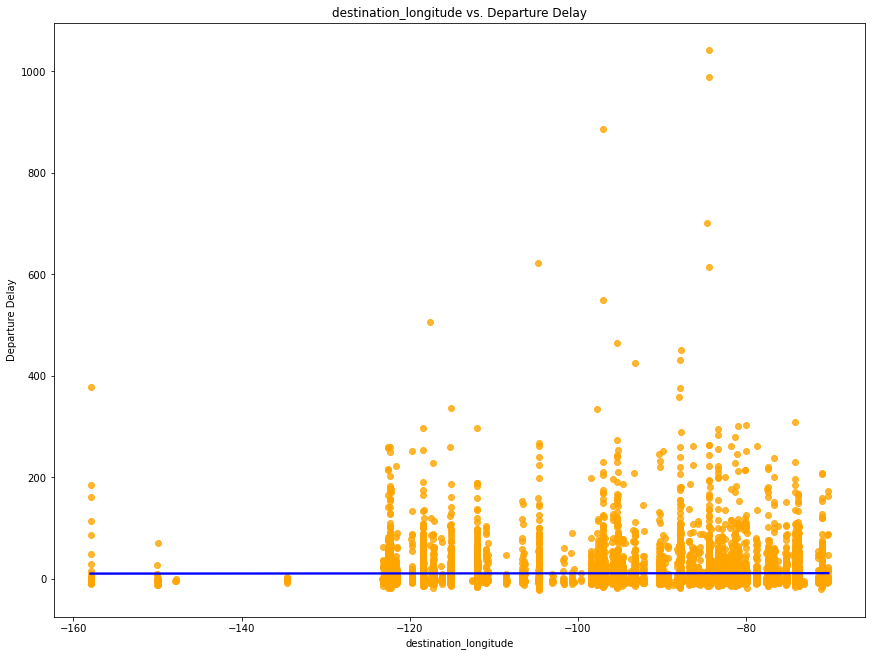

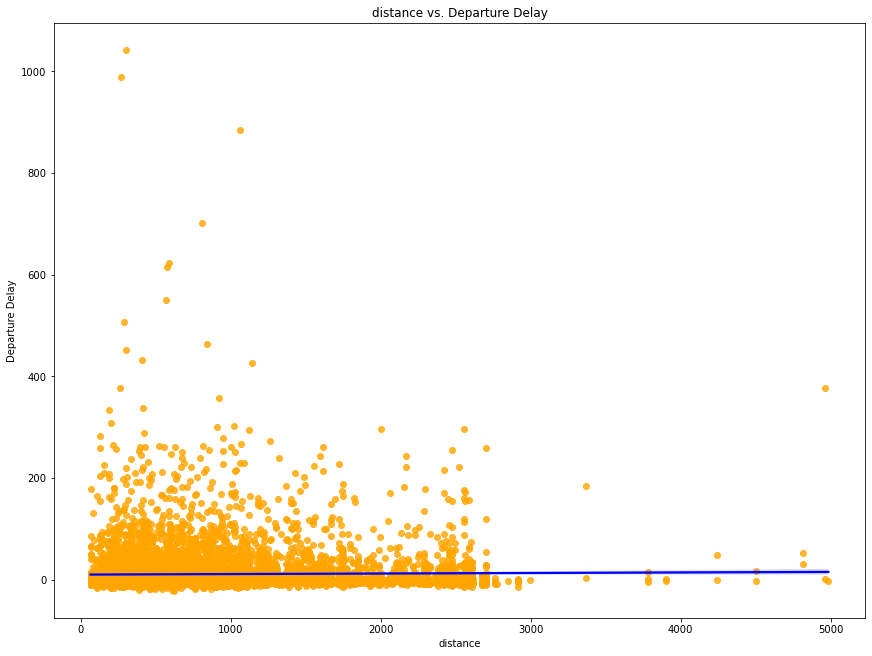

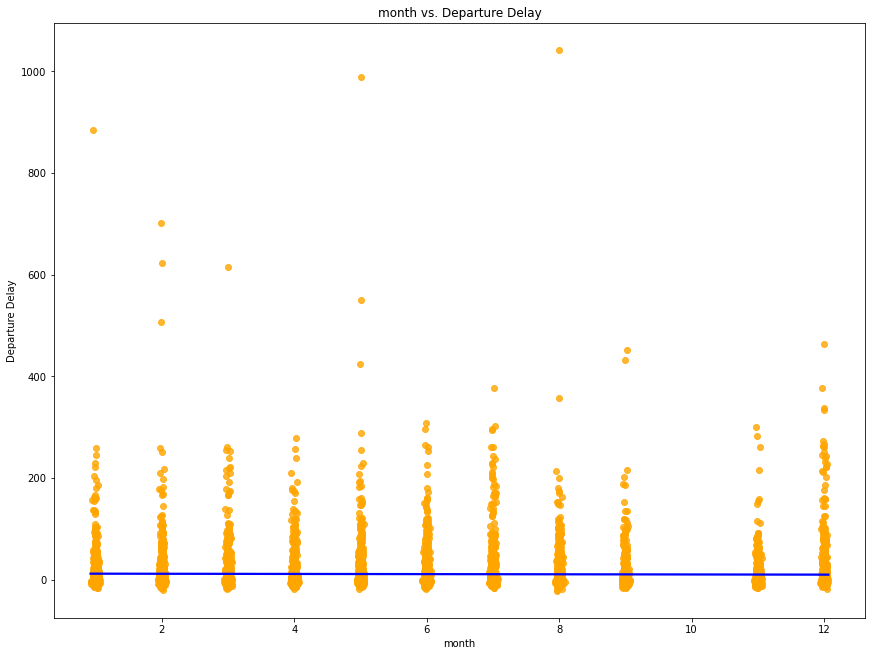

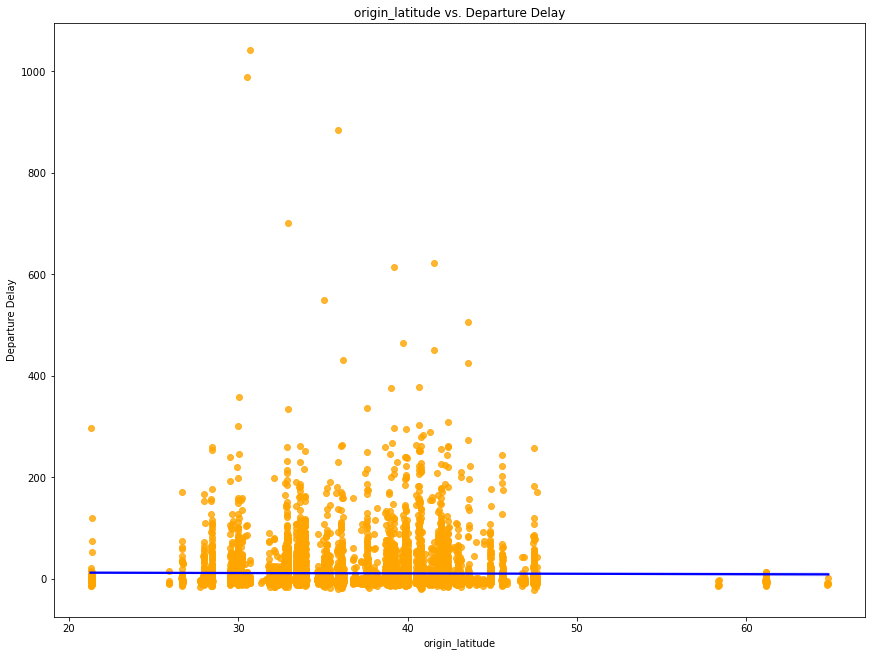

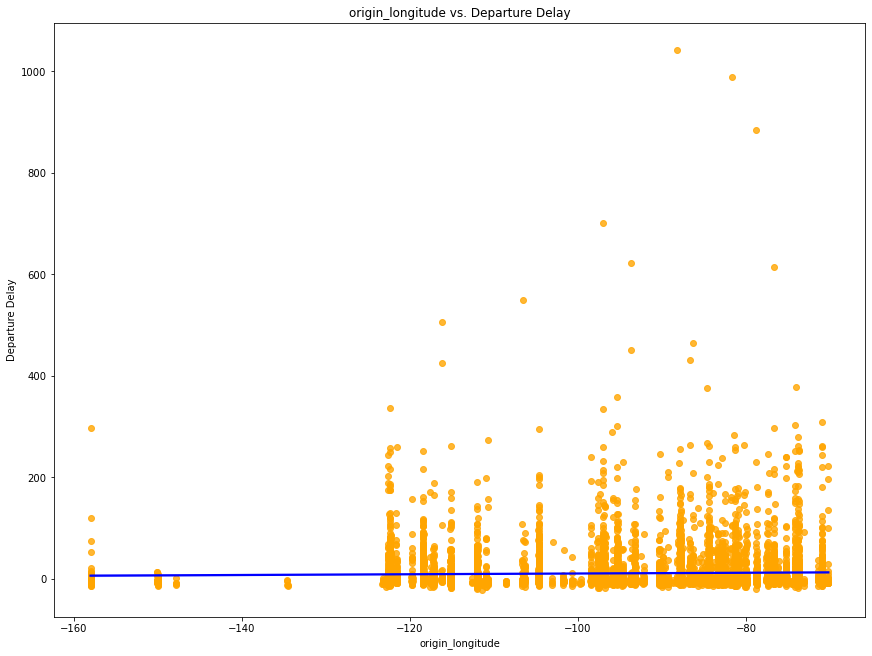

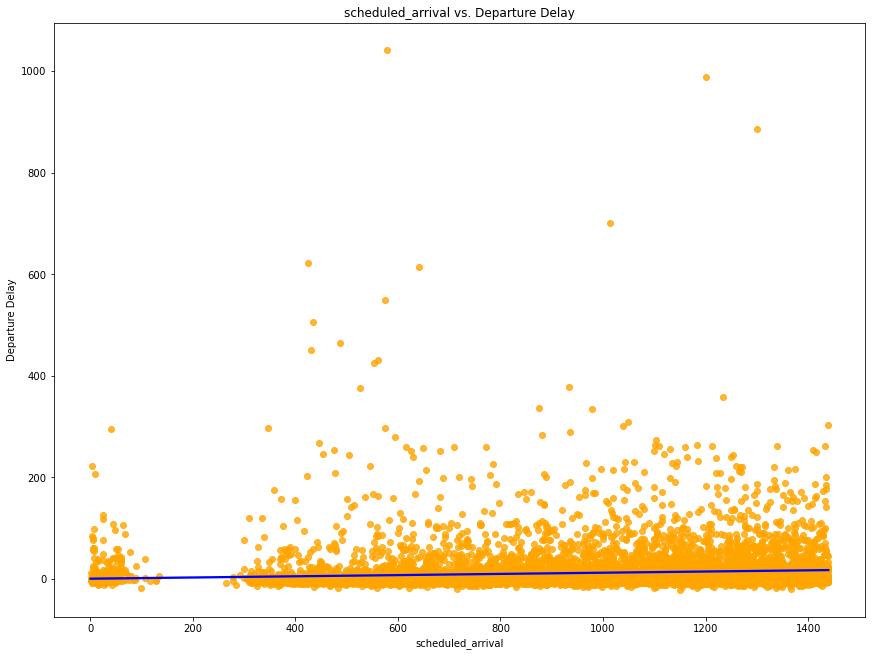

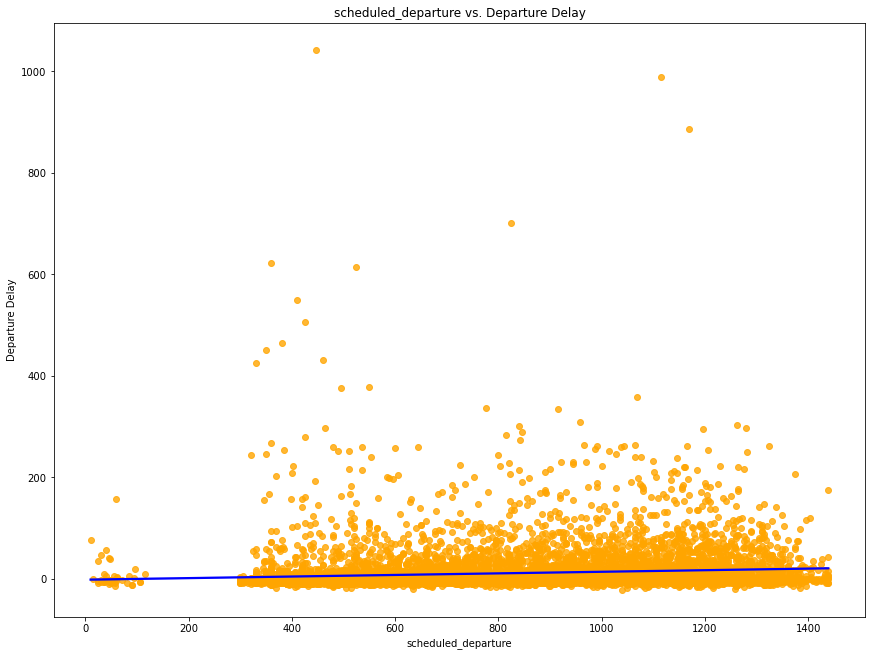

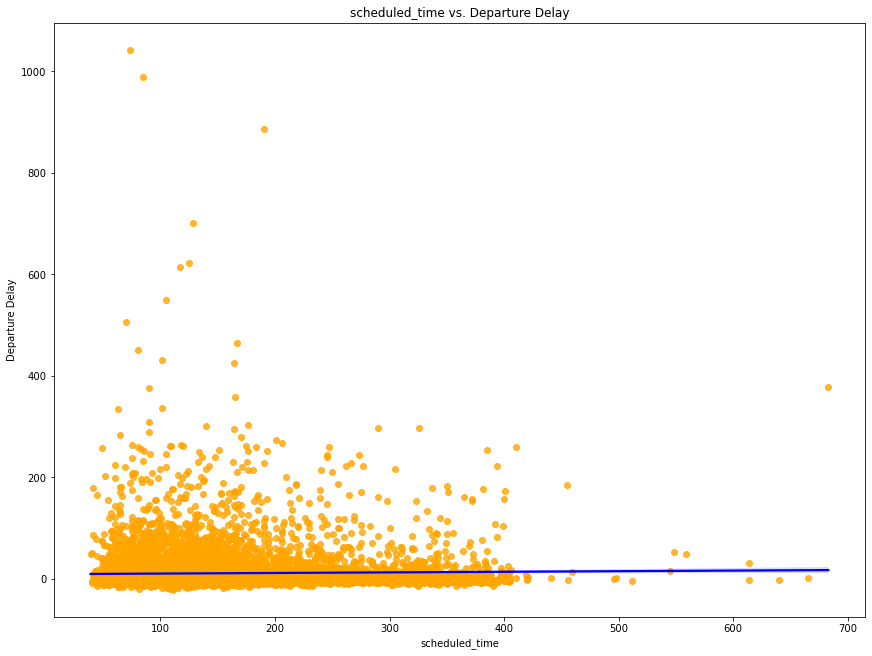

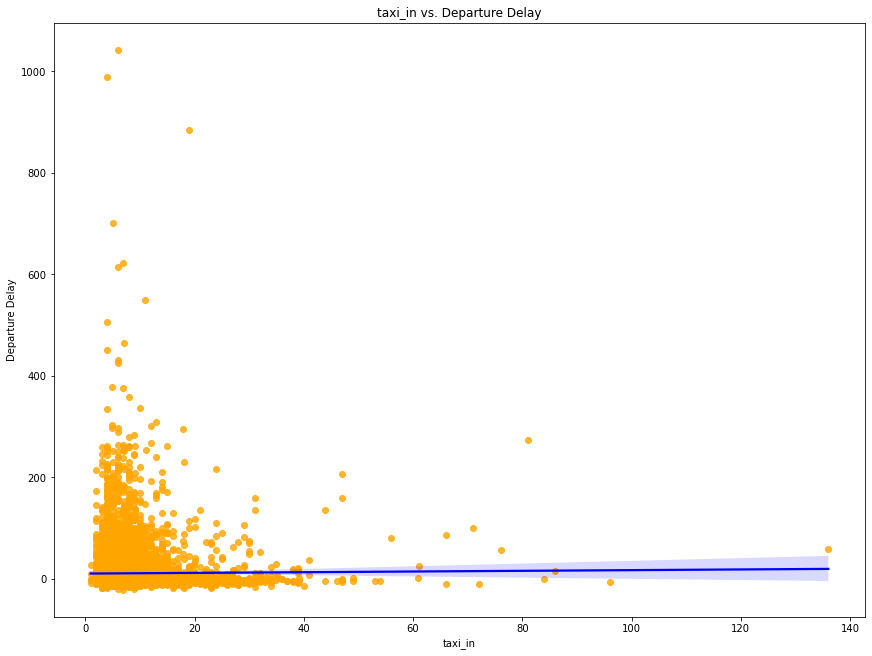

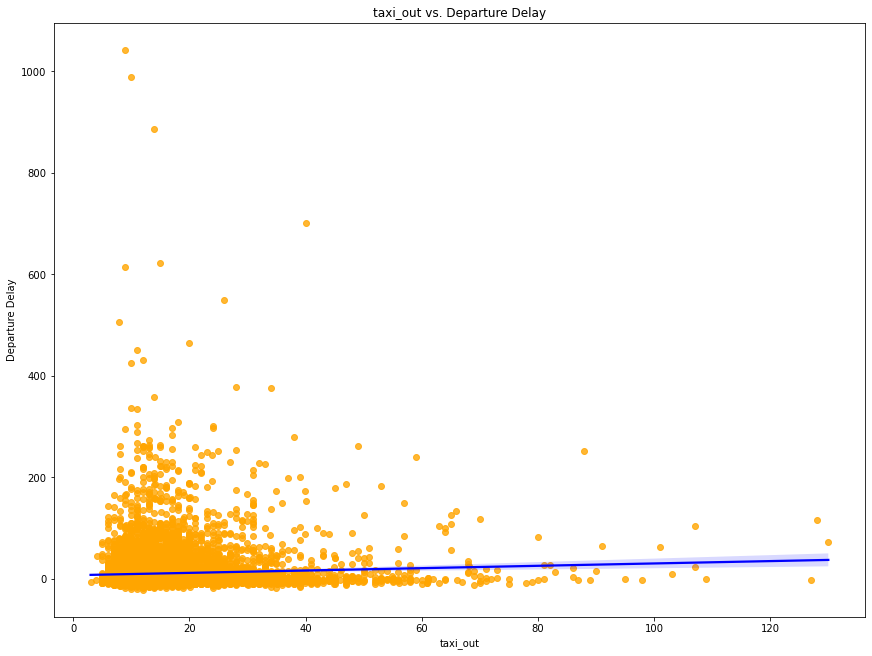

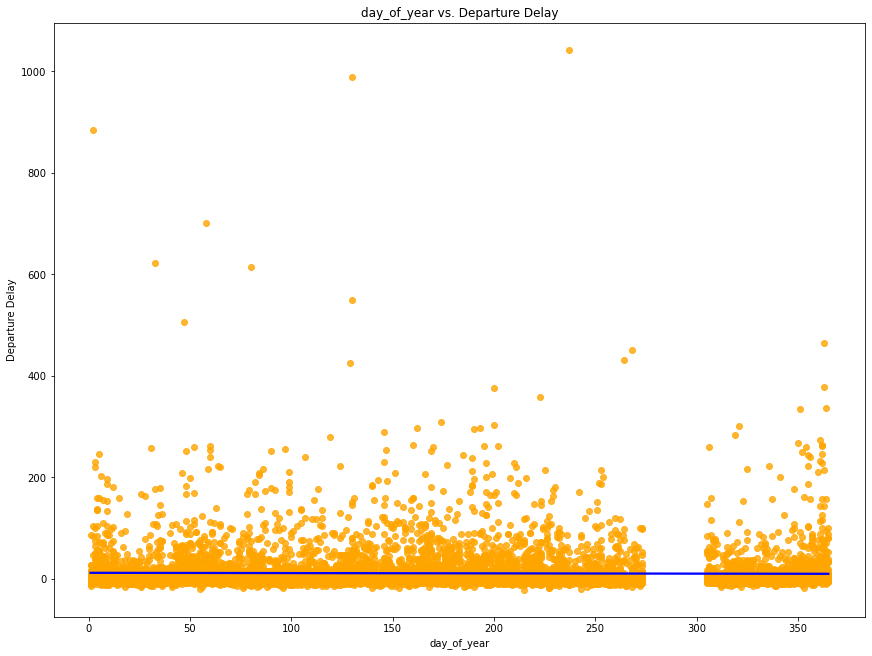

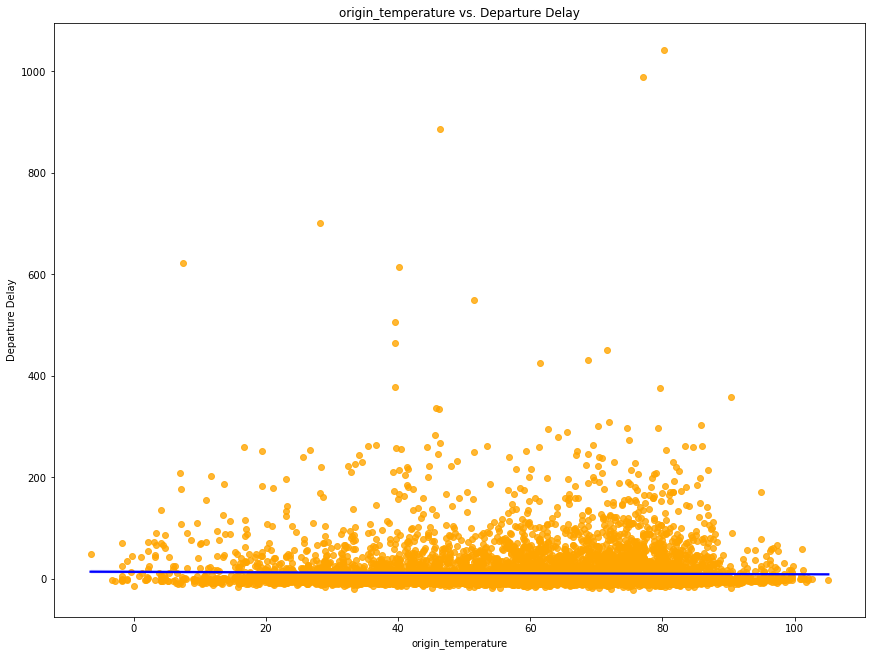

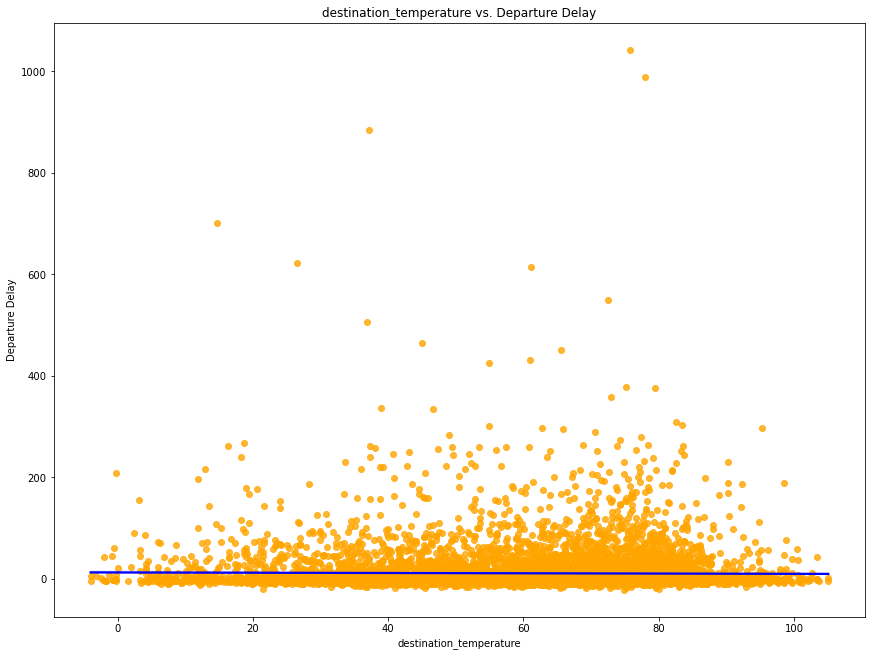

['airline', 'departure_delay', 'destination_airport', 'origin_airport', 'state_destination', 'state_origin']


In [102]:
#Jittering points to better see the density of points in any given region of the plot
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)

non_numeric_columns = []

for i in flights_sample1.columns:
    if (flights_sample1[str(i)].dtype == 'int64' or flights_sample1[str(i)].dtype == 'float64') and (str(i) != 'departure_delay') :
        plt.figure(figsize=(12,9), layout = 'constrained')
        #plt.scatter(jitter(flights_sample[i],0),jitter(flights_sample['departure_delay'],0))
        sns.regplot(x = jitter(flights_sample1[i],0), y = jitter(flights_sample1['departure_delay'],0),color = 'orange', line_kws = {'color':'blue'})
        plt.title(str(i) + ' vs. Departure Delay')
        plt.xlabel(str(i))
        plt.ylabel('Departure Delay')
        # Show/save figure as desired.
        plt.show()
    else:
        non_numeric_columns.append(str(i))
print(non_numeric_columns)


#### **EDA:**

### Distribution of Categorical Variables Against departure_delay (Response Variable)

In [ ]:
### Remove those whose mean is less than the overall mean or 125% of the overall mean and then plot the distributions

In [103]:
non_numeric_columns

['airline',
 'departure_delay',
 'destination_airport',
 'origin_airport',
 'state_destination',
 'state_origin']

In [125]:
k = flights_sample.groupby(['airline']).mean()['departure_delay'].mean()
j = flights_sample.groupby(['airline']).mean()['departure_delay'] 
yallo = j[j>k].index.to_list()

mod_data = flights_sample.loc[flights_sample['airline'].isin(yallo)]
mod_data
mod_data.airline.value_counts()

WN    2237
AA    1154
UA    1104
OO     866
MQ     455
F9     192
NK     149
Name: airline, dtype: int64

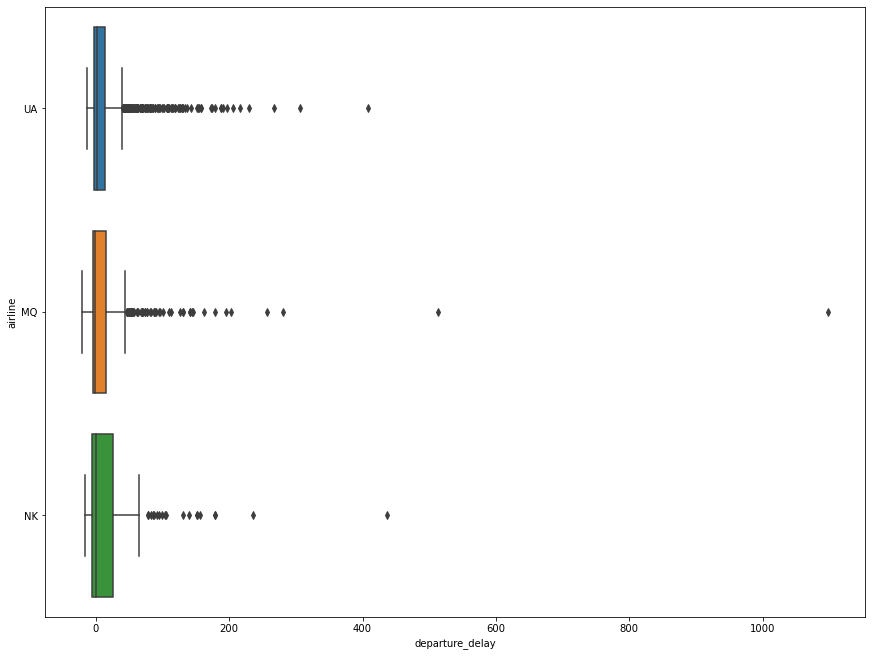

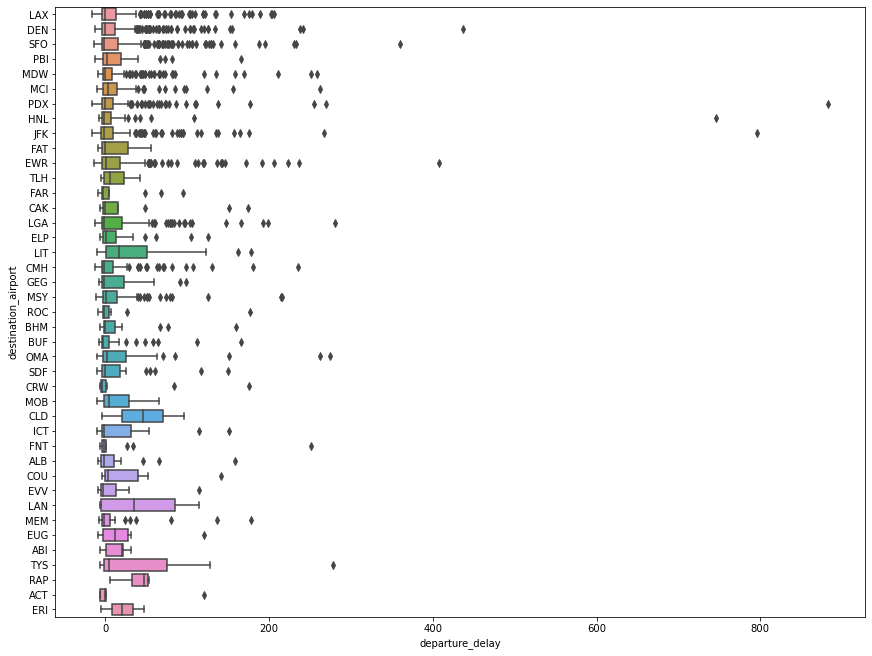

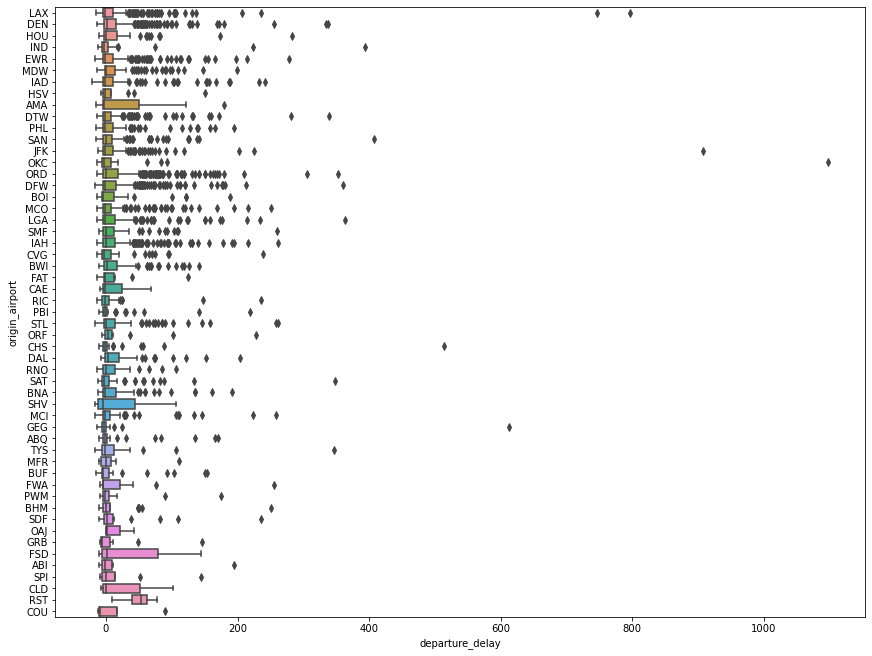

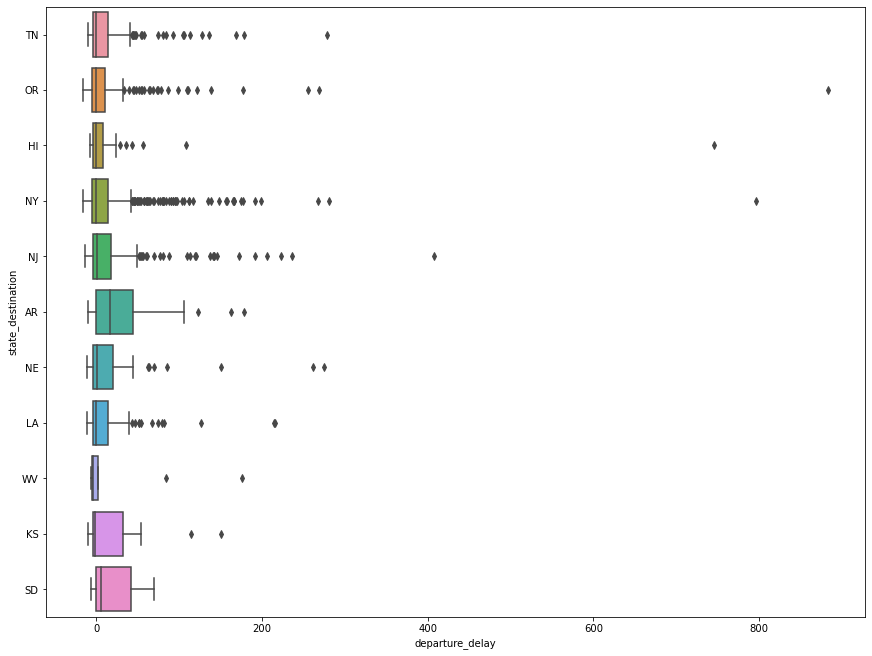

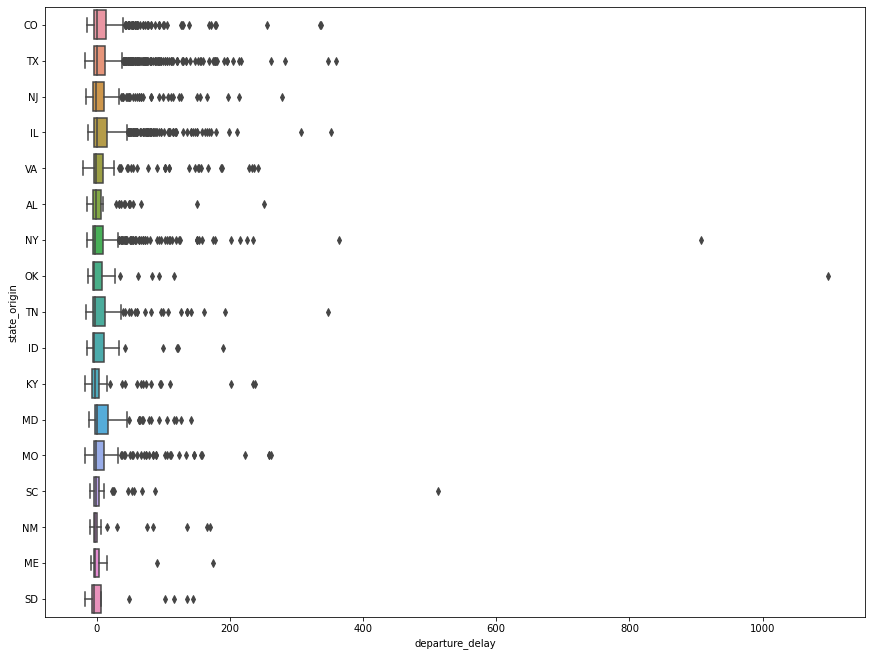

In [130]:
for i in flights_sample1.columns:
    if non_numeric_columns.count(str(i)) > 0 and str(i) != 'departure_delay' :
        k = flights_sample.groupby([str(i)]).mean()['departure_delay'].mean()
        j = flights_sample.groupby([str(i)]).mean()['departure_delay'] 
        pot_sig_var = j[j>1.25*k].index.to_list()
        mod_data = flights_sample.loc[flights_sample[str(i)].isin(pot_sig_var)]

        plt.figure(figsize=(12,9), layout = 'constrained')
        sns.boxplot(y = mod_data[str(i)], x = mod_data['departure_delay'])
        plt.show()


#### **EDA:**

##### Distribution of Predictors

In [ ]:
#Jittering points to better see the density of points in any given region of the plot
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)

for i in flights_sample.columns:
    if (flights_sample[str(i)].dtype == 'int64' or flights_sample[str(i)].dtype == 'float64'):
        sns.set(rc = {'figure.figsize':(20,12)})
        sns.set(font_scale = 2)
        sns.histplot(flights_sample[str(i)],kde=True)
        plt.show()

##### 2D Histogram Binning 

In [ ]:
model = smf.ols(formula= 'departure_delay ~ ''+'.join()', data=flights_sample).fit()


# Linear Regression Model Generation

#### Baseline Model

#### Optimized Model

In [ ]:
model = smf.ols(formula= 'departure_delay ~  month*day + I(taxi_out**2) + I(taxi_in**2) + distance + I(distance**2) + scheduled_departure + longitude + origin_airport', data=flights_sample).fit()
model.summary()

# Miscellaneous

In [ ]:
#Grouping the observations by 'country'
grouped = flights_sample.groupby(['airline','city']).mean()[['departure_delay','day_of_year']]
grouped

In [ ]:
flights_sample._get_numeric_data()